**Homework 1 Draft**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math

1.1 Load the data into memory using pandas and print the first lines to get a sense of it.

In [6]:
data = pd.read_csv("data/upworthy.csv.gz")
data.head(10)

,created_at,updated_at,clickability_test_id,excerpt,headline,lede,slug,eyecatcher_id,impressions,clicks,significance,first_place,winner,share_text,square,test_week
0,2014-11-20 06:43:16.005,2016-04-02 16:33:38.062,546d88fb84ad38b2ce000024,Things that matter. Pass 'em on.,They're Being Called 'Walmart's Worst Nightmar...,"<p>When I saw *why* people are calling them ""W...",theyre-being-called-walmarts-worst-nightmare-a...,546d6fa19ad54eec8d00002d,3052,150,100.0,True,True,Anyone who's ever felt guilty about shopping a...,NaN,201446
1,2014-11-20 06:54:36.335,2016-04-02 16:25:54.027,546d902c26714c6c44000039,Things that matter. Pass 'em on.,This Is What Sexism Against Men Sounds Like,<p>DISCLOSURE: I'm a dude. I have cried on mul...,this-is-what-sexism-against-men-sounds-like-am...,546bc55335992b86c8000043,3526,90,4.1,False,False,"If you ever wondered, ""but what about the men?...",NaN,201446
2,2014-11-20 06:54:57.878,2016-04-02 16:31:45.671,546d902c26714c6c44000039,Things that matter. Pass 'em on.,This Is What Sexism Against Men Sounds Like,<p>DISCLOSURE: I'm a dude. I have cried on mul...,this-is-what-sexism-against-men-sounds-like-am...,546d900426714cd2dd00002e,3506,120,100.0,True,False,"If you ever wondered, ""but what about the men?...",NaN,201446
3,2014-11-20 06:55:07.212,2016-04-02 16:25:54.029,546d902c26714c6c44000039,Things that matter. Pass 'em on.,This Is What Sexism Against Men Sounds Like,<p>DISCLOSURE: I'm a dude. I have cried on mul...,this-is-what-sexism-against-men-sounds-like-am...,546d900426714c6c44000038,3380,98,25.3,False,False,"If you ever wondered, ""but what about the men?...",NaN,201446
4,2014-11-20 06:55:20.347,2016-04-02 16:25:54.032,546d902c26714c6c44000039,Things that matter. Pass 'em on.,This Is What Sexism Against Men Sounds Like,<p>DISCLOSURE: I'm a dude. I have cried on mul...,this-is-what-sexism-against-men-sounds-like-am...,546d900426714c1ad900001e,3465,75,0.2,False,False,"If you ever wondered, ""but what about the men?...",NaN,201446
5,2014-11-20 06:55:43.497,2016-04-02 16:25:54.034,546d902c26714c6c44000039,Things that matter. Pass 'em on.,This Is What Sexism Against Men Sounds Like,<p>DISCLOSURE: I'm a dude. I have cried on mul...,this-is-what-sexism-against-men-sounds-like-am...,546d900484ad38b2ce000027,3431,86,3.2,False,False,"If you ever wondered, ""but what about the men?...",NaN,201446
6,2014-11-20 06:55:57.651,2016-04-02 16:25:54.039,546d902c26714c6c44000039,Things that matter. Pass 'em on.,This Is What Sexism Against Men Sounds Like,<p>DISCLOSURE: I'm a dude. I have cried on mul...,this-is-what-sexism-against-men-sounds-like-am...,546d900484ad385a0a000038,3394,76,0.5,False,False,"If you ever wondered, ""but what about the men?...",NaN,201446
7,2014-11-20 06:56:08.696,2016-04-02 16:25:54.043,546d902c26714c6c44000039,Things that matter. Pass 'em on.,This Is What Sexism Against Men Sounds Like,<p>DISCLOSURE: I'm a dude. I have cried on mul...,this-is-what-sexism-against-men-sounds-like-am...,546d900484ad381bbe00002b,3505,95,11.6,False,False,"If you ever wondered, ""but what about the men?...",NaN,201446
8,2014-11-20 06:56:21.343,2016-04-02 16:31:48.08,546d902c26714c6c44000039,Things that matter. Pass 'em on.,This Is What Sexism Against Men Sounds Like,<p>DISCLOSURE: I'm a dude. I have cried on mul...,this-is-what-sexism-against-men-sounds-like-am...,546d900426714cd2dd00002f,3423,84,1.9,False,False,"If you ever wondered, ""but what about the men?...",NaN,201446
9,2014-11-20 13:23:11.221,2016-04-02 16:31:45.612,546deb3f26714cd2dd00003a,Things that matter. Pass 'em on.,Kim Jong Un Would Really Hate For You To Watch...,"<p>At age 21, Yeonmi Park is a brand new activ...",kim-jong-un-would-really-hate-for-you-to-watch...,545c477e74bfe7589400000b,3910,142,38.6,False,False,NaN,NaN,201446


1.2 Each experiment comparing different versions of the same news piece ("packages") has a unique identifier (clickability_test_id column). Calculate how many different experiments were conducted in this dataset and, on average, how many packages were considered per experiment. Last, plot the distribution of packages per experiment with a visualization of your choice.

In [7]:
agg_click_id = data.groupby("clickability_test_id")["clickability_test_id"].agg(['size'])
agg_click_id.sort_values('size', ascending=False).head(len(agg_click_id))

,size
clickability_test_id,
53480581be4154443a000008,14
54112076c81cc7329900001e,11
55286be9626236001c180000,11
53f453dba5eeed865e00001f,11
5308c3271e030e5930000003,11
...,...
5488b73931386100122d0000,1
5488be3f31386100123b0000,1
5489d8ef3138610018950000,1


In [8]:
print("The average number of packages per experiment is", agg_click_id['size'].mean(), "packages." )

The average number of packages per experiment is 4.2727084197428455 packages.


(array([2.890e+02, 1.960e+02, 3.530e+02, 2.314e+03, 7.820e+02, 6.710e+02,
        1.210e+02, 6.700e+01, 1.400e+01, 6.000e+00, 8.000e+00, 0.000e+00,
        1.000e+00]),
 array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
        14.]),
 <BarContainer object of 13 artists>)

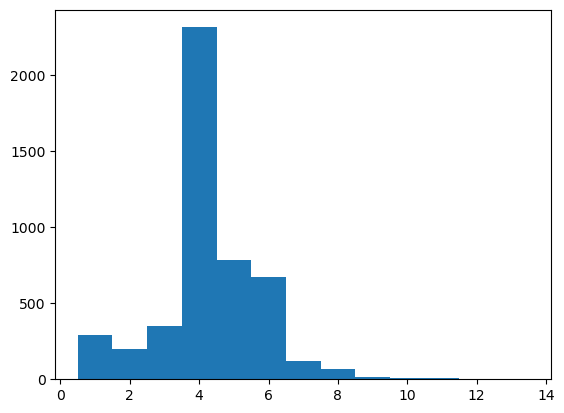

In [9]:
plt.hist(agg_click_id["size"], bins=13, align='left') # maybe do something logarithmic

1.3 A common way to measure success in online A/B tests is what is called "the clickthrough rate." Given that often A/B tests are created to find what engages users (here, "packages" of headlines, images, etc), we would expect that a "good" package makes people click often. Create a column named ctr by dividing the number of clicks a package received (clicks column) by the number of impressions it received (impressions column).

In [10]:
data["ctr"] = data["clicks"]/data["impressions"]
data[["clickability_test_id", "clicks", "impressions", "ctr"]].head() #test

,clickability_test_id,clicks,impressions,ctr
0,546d88fb84ad38b2ce000024,150,3052,0.049148
1,546d902c26714c6c44000039,90,3526,0.025525
2,546d902c26714c6c44000039,120,3506,0.034227
3,546d902c26714c6c44000039,98,3380,0.028994
4,546d902c26714c6c44000039,75,3465,0.021645


1.4 Packages varied any combination of the headline (headline column), the excerpt (excerpt), the first sentence of the article (lede), and the image that illustrates the news piece (eyecatcher_id, a hash per image). But we want to isolate the effect of the headline on the clickthrough rate. To do that, create a new dataframe where you filter all experiments where only one headline is present. Print the length of this new dataframe and how many experiments were discarded in the filtering process.

In [12]:
drop_headline_dupes = data[["headline","clickability_test_id"]].drop_duplicates(keep='last') # table of each distinct headline
#print(len(drop_headline_dupes))
distinct_headlines = drop_headline_dupes.merge(data.drop("headline", axis=1).drop("clickability_test_id", axis=1), left_index=True, right_index=True) # the original table, but with only one copy of each headline
#distinct_headlines.head(len(distinct_headlines))
# QUESTION: is it possible that two distinct experiments (distinct clickability_test_id) use the exact same headline? 
# If yes, then our way of eliminating duplicates is wrong and we should have a table of each distinct (click_id, headline) pair instead

#distinct_headlines.head(len(distinct_headlines))
print(len(distinct_headlines))
count_by_experiment = distinct_headlines.groupby("clickability_test_id")["clickability_test_id"].agg(['size'])#.sort_values('size', ascending=False) #sort_values is used for testing
count_by_experiment.head(10)
headlines_more_than_one = count_by_experiment[count_by_experiment['size']>1]#.sort_values('size', ascending=False) #sort_values is used for testing
#headlines_more_than_one.head(len(headlines_more_than_one))
print("Number of experiments with more than one headline:", len(headlines_more_than_one))
print("Number of packages corresponding to experiments with more than one headline:", headlines_more_than_one['size'].sum())
print("Number of discarded experiments in filtering:", len(agg_click_id)-len(headlines_more_than_one))

#merge the list of click_ids we got with the originql dataframe (acts as a filter)
data_headlines_more_than_one = headlines_more_than_one.drop('size', axis=1).merge(distinct_headlines, on='clickability_test_id')

# print('len =', len(data_headlines_more_than_one))
# data_headlines_more_than_one.head()

13130
Number of experiments with more than one headline: 2586
Number of packages corresponding to experiments with more than one headline: 10894
Number of discarded experiments in filtering: 2236
len = 10894


,clickability_test_id,headline,created_at,updated_at,excerpt,lede,slug,eyecatcher_id,impressions,clicks,significance,first_place,winner,share_text,square,test_week,ctr
0,51436061220cb800020001e7,Creationism Has Nothing To Do With Christianit...,2013-02-24 07:10:53,2016-04-02 16:24:07.081,Religion and science can indeed be friends.,"<p>In a debate about creationism, one guy got ...",creationism-has-nothing-to-do-with-christianit...,5332ba141fae79f09f002c4f,2551,39,0.8,False,False,NaN,A_Priest_Ridicules_Creationist_-_YouTube.jpg,201308,0.015288
1,51436061220cb800020001e7,The One Where A Creationist Picks A Fight And ...,2013-02-24 07:08:08,2016-04-02 16:26:25.064,"Good show, father.","<p>In a debate about creationism, one guy got ...",the-one-where-a-creationist-picks-a-fight-and-...,5332ba141fae79f09f002c4f,2629,68,100.0,True,True,NaN,A_Priest_Ridicules_Creationist_-_YouTube.jpg,201308,0.025865
2,51436061220cb800020001e7,Creationism Shouldn't Be Taught In Science Cla...,2013-02-24 07:07:13,2016-04-02 16:26:28.801,Why is he wearing that costume?,"<p>In a debate about creationism, one guy got ...",creationism-shouldnt-be-taught-in-science-clas...,5332ba141fae79f09f002c4f,2539,49,11.9,False,False,NaN,A_Priest_Ridicules_Creationist_-_YouTube.jpg,201308,0.019299
3,51436061220cb800020001e7,God Finds Out About Creationism And Sends A Re...,2013-02-24 07:09:18,2016-04-02 16:26:28.804,"Well played, God. Well played.","<p>In a debate about creationism, one guy got ...",god-finds-out-about-creationism-and-sends-a-re...,5332ba141fae79f09f002c4f,2661,63,61.4,False,False,NaN,A_Priest_Ridicules_Creationist_-_YouTube.jpg,201308,0.023675
4,51436069220cb800020005ae,The One Where Your Advertisements Talk To You ...,2013-03-17 07:38:21,2016-04-02 16:24:11.525,"Honesty is so refreshing. Also, rude.",Learn what advertisements say to each other be...,the-one-where-your-advertisements-talk-to-you-...,5332b5961fae79f09f000636,1950,15,0.0,False,False,NaN,Screenshot_3_17_13_1_32_AM_MDT.jpg,201311,0.007692


In [8]:
pd.set_option('display.max_colwidth', None)
drop_headline_dupes[["headline"]].head()

,headline
0,They're Being Called 'Walmart's Worst Nightmare.' And I *Really* Hope It Comes True.
8,This Is What Sexism Against Men Sounds Like
10,What They Learned From The Scientist Was Terrifying. But That's What They Needed To Hear.
15,Kim Jong Un Would Really Hate For You To Watch This Which Is Exactly Why You Should
19,A Bunch Of Celebrities Recorded A Song To Raise Money For Ebola. Meet The One Who Said 'No Thanks'.


1.5 For comparison, repeat the procedure described in T1.4 with the eyecatcher_id column, i.e., create a dataframe considering only experiments that vary the image. Again, print the length of this new dataframe and how many experiments were discarded in the filtering process.

In [9]:
len(data["eyecatcher_id"].value_counts())

9678

In [11]:
drop_image_dupes = data[["eyecatcher_id","clickability_test_id"]].drop_duplicates(keep='last').dropna()#.sort_values('eyecatcher_id')
#print(len(drop_image_dupes))
distinct_images = drop_image_dupes.merge(data.drop("eyecatcher_id", axis=1).drop("clickability_test_id", axis=1), left_index =True, right_index=True)
#distinct_images["eyecatcher_id"].head(len(distinct_images))
print(len(distinct_images))
count_by_exp_2 = distinct_images.groupby("clickability_test_id")["clickability_test_id"].agg(['size'])#.sort_values('size', ascending=False) #sort_values is used for testing
#count_by_exp_2.head(10)
images_more_than_one = count_by_exp_2[count_by_exp_2['size']>1]#.sort_values('size')  #sort_values is used for testing
#images_more_than_one.head(len(images_more_than_one))
print(images_more_than_one['size'].sum())
print("Number of experiments with more than one image:", len(images_more_than_one))
print("Number of packages corresponding to experiments with more than one image:", images_more_than_one['size'].sum())
print("Number of discarded experiments in filtering:", len(agg_click_id)-len(images_more_than_one))

#merge the list of click_ids we got with the original dataframe (acts as a filter)
data_images_more_than_one = images_more_than_one.drop('size', axis=1).merge(distinct_headlines, on='clickability_test_id')
data_images_more_than_one.head()

10541
7438
Number of experiments with more than one image: 1714
Number of packages corresponding to experiments with more than one image: 7438
Number of discarded experiments in filtering: 3108


,clickability_test_id,headline,created_at,updated_at,excerpt,lede,slug,eyecatcher_id,impressions,clicks,significance,first_place,winner,share_text,square,test_week,ctr
0,51436074220cb800020007af,The Truth About The Deficit No One Wants You To Know,2013-03-05 23:43:46,2016-04-02 16:26:25.927,The only thing out of control about government spending are the people talking about it.,<p><p>Don't believe the hype:\nThe U.S. budget deficit isn't as bad as you might think.</p></p>,the-truth-about-the-deficit-no-one-wants-you-to-know,5332ba271fae79f09f002e32,2853,28,100.0,True,False,NaN,Thumbnail_1_-_Future_Deficit__2-28-13.png,201309,0.009814
1,51436074220cb800020007af,The Only Thing Out Of Control About Government Spending Is The People Talking About It,2013-03-05 23:44:15,2016-04-02 16:26:28.96,The truth about the deficit no one wants you to know.,<p><p>Don't believe the hype:\nThe U.S. budget deficit isn't as bad as you might think.</p></p>,the-only-thing-out-of-control-about-government-spending-are-the-people-talking-a,5332ba671fae79f09f003458,2753,27,99.2,False,False,NaN,Thumbnail_2_-_Future_Deficit__3-5-13.png,201309,0.009807
2,51436074220cb800020007af,Am I The Only One Who Thinks It's Crazy That The U.S. Is About To Sabotage Its Own Economy?,2013-03-05 23:45:09,2016-04-02 16:26:28.963,The only thing out of control about government spending is the people talking about it.,<p><p>Don't believe the hype:\nThe U.S. budget deficit isn't as bad as you might think.</p></p>,am-i-the-only-one-who-thinks-its-crazy-that-the-u-s-is-about-to-sabotage-its-own-2,5332ba671fae79f09f003458,2864,27,87.9,False,True,NaN,Thumbnail_2_-_Future_Deficit__3-5-13.png,201309,0.009427
3,51436074220cb800020007af,That Awkward Moment When You Realize All These Deficit Hawks Are Full Of Crap,2013-03-05 23:45:49,2016-04-02 16:26:28.966,The only thing out of control about government spending are the people talking about it.,<p><p>Don't believe the hype:\nThe U.S. budget deficit isn't as bad as you might think.</p></p>,that-awkward-moment-when-you-realize-all-these-deficit-hawks-are-full-of-crap,5332ba671fae79f09f00345a,2740,22,47.7,False,False,NaN,Thumbnail_3_-_Future_Deficit__3-5-13.png,201309,0.008029
4,51436074220cb800020007b2,I Would Not Want To Hear This Heartbreaking Sound Coming From My Mom,2013-03-06 07:01:56,2016-04-02 16:24:08.362,Watch this so no one else has to hear it either.,<p>Ray Krone was in the wrong place at the wrong time. Then this happened.</p>,i-would-not-want-to-hear-this-heartbreaking-sound-coming-from-my-mom,5332ba2f1fae79f09f002ecb,2623,35,0.0,False,False,NaN,Ray_Krone.jpg,201309,0.013343


1.6 Discuss: Considering the answers to questions T1.4 and T1.4, what can we say about the different versions of the news tested by Upworthy?

**Answer** : 

1.7 For our subsequent analysis, we want to compare the causal effect of headlines on the success of a news piece. 
For that, we can compare pairs of packages with the same `eyecatcher_id`, `lede`, and `excerpt`, but different `headlines`.
Note that this means that if an experiment considered 5 different headlines and did not vary any other stimulus, we would have 5C2 (i.e., 5 choose 2, 10) pairs to consider.
Create a dataset where:
- each row corresponds to a pair of packages with different `headline` but the same `eyecatcher_id`, `lede`, and `excerpt`. 
- there are columns containing the headlines of each of the news versions (`headline1`, `headline2`) and the clickthrough rate of each of the news versions (`ctr1`, `ctr2`). 
- the columns `headline1` and `ctr1` contain the data associated with the news version with the highest clickthrough rate. Print the first columns of your newly created dataframe, as well as its length.
-  the columns where the two news pieces had exactly the same clickthrough rate should be filtered out (this is for simplicity's sake).
-  the column `date_created` contains the date when the news version with the highest clickthrough rate was created.

In [12]:
data_headlines_more_than_one_2 = data_headlines_more_than_one.copy() # deep copy of the first dataframe
paired_data = data_headlines_more_than_one.merge(data_headlines_more_than_one_2, on=['eyecatcher_id', 'lede', 'excerpt','clickability_test_id'])
#filter out the pairs where it's twice the same ctr, and for each unordered pair filter out the "doublon" where ctr1<ctr2
paired_data = paired_data[paired_data['ctr_x']>paired_data['ctr_y']]

print(len(paired_data))
paired_data.drop('created_at_y', axis=1)
paired_data.rename(columns={'ctr_x':'ctr1', 'ctr_y':'ctr2','headline_x':'headline1', 
                            'headline_y':'headline2', 'created_at_x':'date_created'}, inplace=True)
paired_data[['date_created','headline1', 'headline2', 'ctr1', 'ctr2']].head()
print(len(paired_data))
#for i in(range(0,10)):
 #   display(paired_data.iloc[i][['ctr1','ctr2']])
#can we rename all the other columns not one by one...

17458
17458
